In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [158]:
### Preprocessing: Convert categorical data to numeric ###

In [159]:
loans_py = pd.read_csv('Resources/2019loans.csv')
loans_cy = pd.read_csv('Resources/2020Q1loans.csv')
loans_py = loans_py.drop(columns=['Unnamed: 0'])

In [160]:
X = loans_py.drop('loan_status', axis = 1)

In [161]:
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['index', 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_

,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,...,0,1,0,1,1,0,1,0,1,0
12176,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,...,1,1,0,1,1,0,1,0,1,0
12177,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,...,0,1,0,1,1,0,1,0,1,0
12178,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,...,0,1,0,1,0,1,1,0,1,0


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

y_label = LabelEncoder().fit_transform(loans_py['loan_status'])
y_label

array([1, 1, 1, ..., 0, 0, 0])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

In [164]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
X_test_scaled

array([[-0.86884072,  0.26219508,  1.12024304, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [-0.97142543,  0.75296671,  0.38381548, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [-1.77412602,  1.07196827, -1.00362923, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       ...,
       [ 0.5308302 , -0.52303953,  2.79049113, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [ 0.78356135,  0.26219508,  2.79049113, ..., -0.1694586 ,
         0.01812499, -0.01812499],
       [ 1.02208108, -0.71934818,  0.69129297, ..., -0.1694586 ,
         0.01812499, -0.01812499]])

k: 1 - Training|Testing Scores: 1.000|0.574
k: 1001 - Training|Testing Scores: 1.000|0.574
k: 2001 - Training|Testing Scores: 1.000|0.574
k: 3001 - Training|Testing Scores: 1.000|0.574
k: 4001 - Training|Testing Scores: 1.000|0.574
k: 5001 - Training|Testing Scores: 1.000|0.574
k: 6001 - Training|Testing Scores: 1.000|0.574
k: 7001 - Training|Testing Scores: 1.000|0.574
k: 8001 - Training|Testing Scores: 1.000|0.574
k: 9001 - Training|Testing Scores: 1.000|0.574
k: 10001 - Training|Testing Scores: 1.000|0.574
k: 11001 - Training|Testing Scores: 1.000|0.574


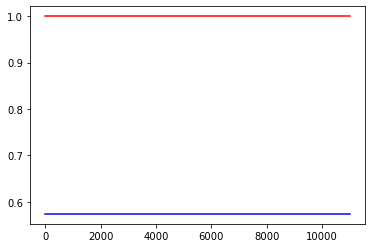

In [169]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1,12000,1000):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k} - Training|Testing Scores: {train_score:.3f}|{test_score:.3f}")
    
plt.plot(range(1,12000,1000), train_scores, c='red')
plt.plot(range(1,12000,1000), test_scores, c='blue')
plt.show()

In [171]:
### Fit a LogisticRegression model and RandomForestClassifier model ###

Logistic Regression vs Random Forest Classifier:

I think the Random Forest Classifier will perform better in this situation than Logistic Regression will. From what we've learned in class, over-fitting the data is a real possibility so if a training set with a particular amount of noise will cause the regression to sacrifice its testing score to "better" fit the training data. In this case, I think the Random Forest Classifier will likely ignore some of those to achieve a more accurate model.


In [172]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [173]:
classifier.fit(X_train, y_train)

C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
print("Logistic Regression")
print(f"Training Score: {classifier.score(X_train, y_train)}")
print(f"Testing Score: {classifier.score(X_test, y_test)}")

Logistic Regression
Training Score: 0.6553913519430761
Testing Score: 0.6469622331691297


In [175]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print("Random Forest Classifier")
print(f"Training Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_test_scaled, y_test)}")

Random Forest Classifier
Training Score: 1.0
Testing Score: 0.7904761904761904


In [177]:
### Revisit the Preprocessing: Scale the data ###

<BarContainer object of 93 artists>

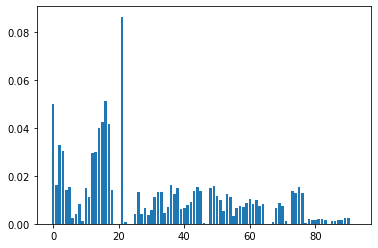

In [178]:
features = clf.feature_importances_
plt.bar(x = range(len(features)), height=features)

In [179]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [180]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_scaled), y_train, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [181]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print("Logistic Regression")
print(f"Training Score: {clf.score(X_selected_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_selected_test_scaled, y_test)}")

Logistic Regression
Training Score: 0.7066121734053423
Testing Score: 0.6900175131348512


In [182]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print("Random Forest Classifier")
print(f"Training Score: {clf.score(X_selected_train_scaled, y_train)}")
print(f"Testing Score: {clf.score(X_selected_test_scaled, y_test)}")

Random Forest Classifier
Training Score: 1.0
Testing Score: 0.8025394045534151
